In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
study_df = mouse_df.merge(clinical_df, how='inner', on="Mouse ID")
columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug']
study_df = study_df[columns]

# Display the data table for preview

study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_df = study_df.groupby(['Drug', 'Timepoint']).mean()

# Convert to DataFrame

# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_se_df = study_df.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
tumor_se_df = tumor_se_df.drop(columns=['Mouse ID', 'Metastatic Sites'])
# Preview DataFrame

tumor_se_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_avg = tumor_se_df.unstack(level = 0)
tumor_avg.columns = tumor_avg.columns.get_level_values(1)

# Preview that Reformatting worked
tumor_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
tumor_avg.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

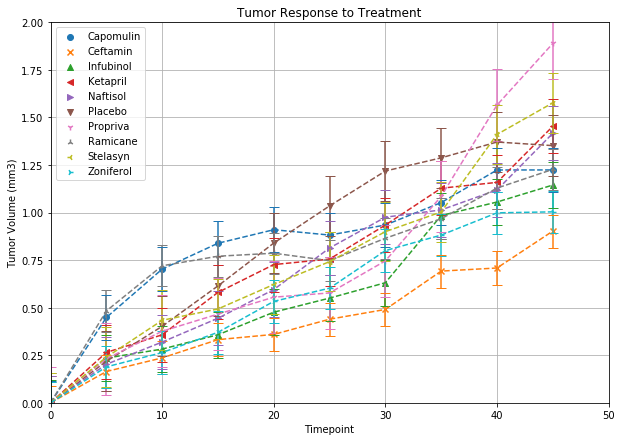

In [7]:
# Generate the Plot (with Error Bars)

counter = 0
markers = ['o','x','^','<','>','v','1','2','3','4']
colors = ['blue','red','green','orange','pink','black','violet','yellow','gray','purple']

x_axis = np.arange(0, 50, 5)
s_error = tumor_avg.sem()

plt.figure(figsize=(10,7))

for column in tumor_avg:
    plt.scatter(x_axis, tumor_avg[column], marker=markers[counter])
    plt.errorbar(x_axis, tumor_avg[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,50)
plt.ylim(0,2)
plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])

# Save the Figure

plt.savefig('Tumor Response to Treatment.png')


In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# NOTE: tumor_df already contains the mean Metastatic information

# Convert to DataFrame

meta_avg = tumor_df.drop(columns=['Tumor Volume (mm3)'])

# Preview DataFrame
meta_avg.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_se_df = study_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
meta_se_df = meta_se_df.drop(columns=['Mouse ID', 'Tumor Volume (mm3)'])

# Preview DataFrame
meta_se_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
meta_avg = meta_se_df.unstack(level = 0)
meta_avg.columns = meta_avg.columns.get_level_values(1)
# Preview that Reformatting worked
meta_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


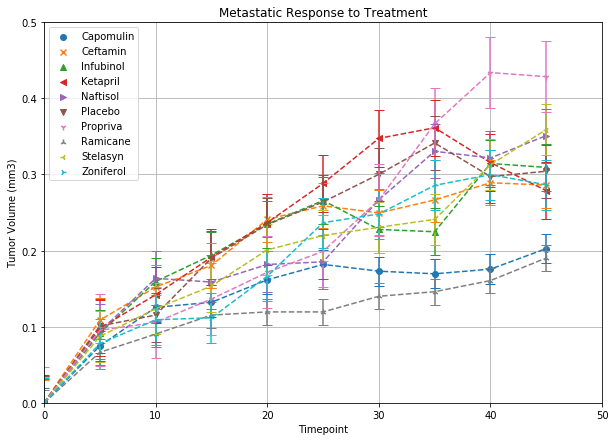

In [12]:
# Generate the Plot (with Error Bars)
counter = 0
markers = ['o','x','^','<','>','v','1','2','3','4']
colors = ['blue','red','pink','black','violet','green','yellow','gray','purple','orange']

x_axis = np.arange(0, 50, 5)
s_error = meta_avg.sem()

plt.figure(figsize=(10,7))

for column in meta_avg:
    plt.scatter(x_axis, meta_avg[column], marker=markers[counter])
    plt.errorbar(x_axis, meta_avg[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,50)
plt.ylim(0,.5)
plt.title("Metastatic Response to Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])

# Save the Figure
plt.savefig('Metastatic Response to Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

survival_df = study_df.groupby(['Timepoint', 'Drug'])['Mouse ID'].nunique()


# Convert to DataFrame

sur_table = survival_df.unstack()

# Preview DataFrame

sur_table


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_avg = survival_df.unstack(level = 0)
mouse_avg.columns = mouse_avg.columns.get_level_values(0)


# Preview the Data Frame
mouse_avg

Timepoint,0,5,10,15,20,25,30,35,40,45
Drug,,,,,,,,,,
Capomulin,25,25,25,24,23,22,22,22,21,21
Ceftamin,25,21,20,19,18,18,16,14,14,13
Infubinol,25,25,21,21,20,18,17,12,10,9
Ketapril,25,23,22,19,19,19,18,17,15,11
Naftisol,25,23,21,21,20,18,15,15,15,13
Placebo,25,24,24,20,19,17,15,14,12,11
Propriva,25,24,22,16,16,14,13,10,9,7
Ramicane,25,25,24,24,23,23,23,21,20,20
Stelasyn,25,24,22,22,20,19,18,16,12,11


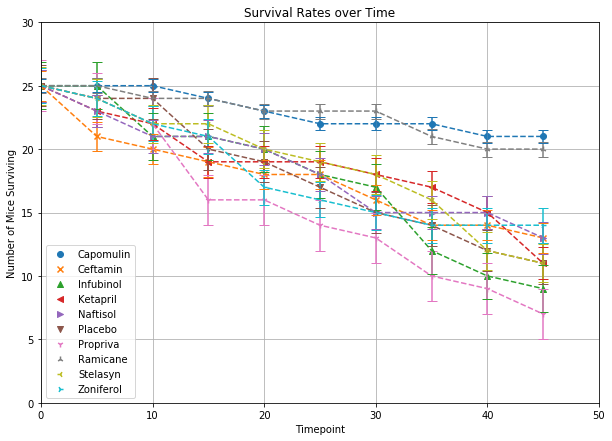

In [15]:
# Generate the Plot (Accounting for percentages)
counter = 0
markers = ['o','x','^','<','>','v','1','2','3','4']
colors = ['blue','red','pink','black','violet','green','yellow','gray','purple','orange']

x_axis = np.arange(0, 50, 5)
s_error = sur_table.sem()

plt.figure(figsize=(10,7))

for column in sur_table:
    plt.scatter(x_axis, sur_table[column], marker=markers[counter])
    plt.errorbar(x_axis, sur_table[column], yerr=s_error[counter], capsize=5, fmt='--')
    counter = counter + 1
plt.xlim(0,50)
plt.ylim(0,30)
plt.title("Survival Rates over Time")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice Surviving")
plt.grid()
plt.legend(['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'])

# Save the Figure
plt.savefig('Survival Rates over Time.png')


# Show the Figure
plt.show()

## Summary Bar Graph

In [196]:
# Calculate the percent changes for each drug
tumor_vol = tumor_df.drop(columns='Metastatic Sites')
tumor_vol = tumor_vol.unstack(level=0)
tumor_vol = ((tumor_vol.iloc[9]-tumor_vol.iloc[0])/tumor_vol.iloc[0])*100


# Display the data to confirm
tumor_vol.index

MultiIndex(levels=[['Tumor Volume (mm3)'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])

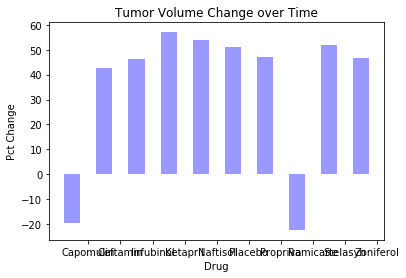

In [202]:
ticks = 10
drugs = (-19.47, 42.51, 46.12, 57.02, 53.92, 51.29, 47.24, -22.32, 52.08, 46.57)
fig, ax = plt.subplots()
index = np.arange(ticks)
bar_width = 0.50
opacity = 0.4


bar_1 = ax.bar(index, drugs, bar_width, alpha=opacity, color='b')

ax.set_xlabel('Drug')
ax.set_ylabel('Pct Change')
ax.set_title('Tumor Volume Change over Time')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'))

plt.savefig('Tumor Volume Change over Time.png')

plt.show()